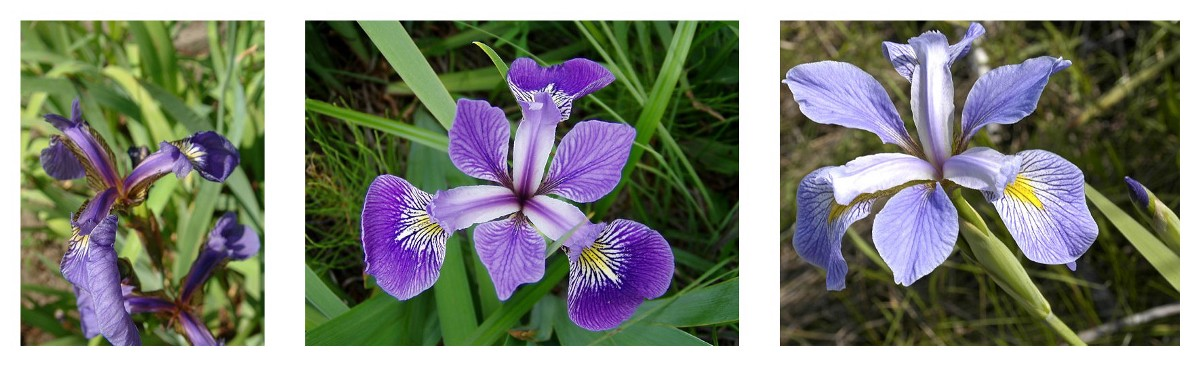

In [75]:
from IPython.display import Image
img = 'C:/users/adity/Downloads/iris.jpg'
Image(filename=img)

# K-Means Clustering on the Iris Dataset

### Import Packeges 

In [73]:
# Importing the libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')



### Import Dataset 

Let's begin by importing the Iris dataset, and showing the first 5 rows.

In [49]:
iris_df=pd.read_csv('C:\\Python\\Unsupervised ML\\Iris.csv')
table = ff.create_table(iris_df.head())
py.iplot(table,filename='jupyter-table1')

# Exploratory Data Analysis 

Let's do some Exploratpory data analysis on this data

In [50]:
print("the dataset has {} rows and {} features".format(iris_df.shape[0],iris_df.shape[1]))

the dataset has 150 rows and 6 features


In [51]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


The data types are correct and we can see that there is no null values in the dataset


we will remove the ID column from the data

In [52]:
iris_df.drop('Id',axis=1,inplace=True)

Let's take a look at the summary statistics

In [53]:
iris_df.describe()
#py.iplot(ff.create_table(data.describe()),filename='describe_table')

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [54]:
print(" we have {} types of species in this dataset".format(iris_df.Species.nunique()))
print("the names of this species are:",iris_df.Species.unique())

 we have 3 types of species in this dataset
the names of this species are: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [55]:
iris_df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So we have equally distributed species all are of 50

Let's visualize the data with a scatter plots based on Sepal and Petal width and lenght

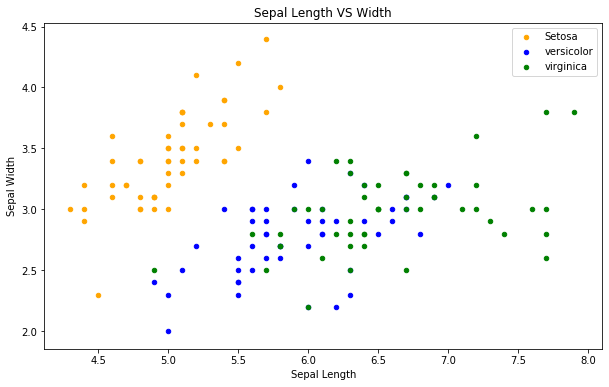

In [56]:
fig =iris_df[iris_df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris_df[iris_df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris_df[iris_df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

we can clearly see that sepal characteristics differentiate setosa but not versicolor and virginica

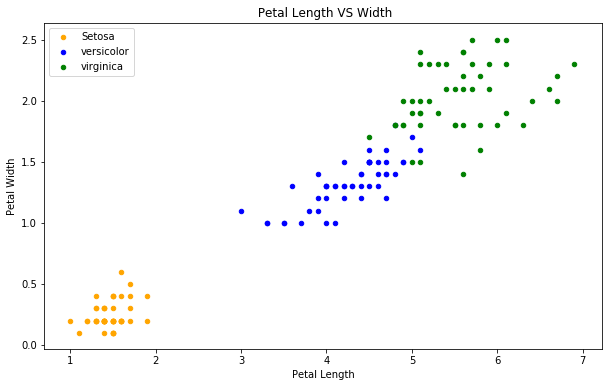

In [57]:
fig = iris_df[iris_df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris_df[iris_df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris_df[iris_df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

With Petal characteristics we can easily classify the species but there is a little thin line between the virginica and versicolor

Let's check the distribution of each column

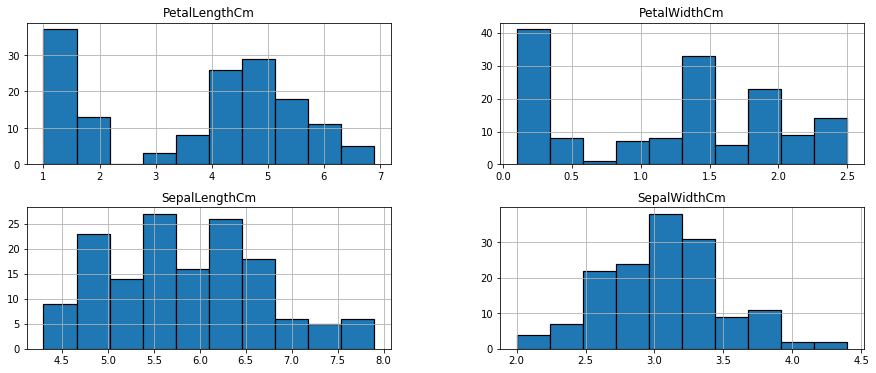

In [58]:
iris_df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(15,6)
plt.show()

Let's take a look at the Probability Density

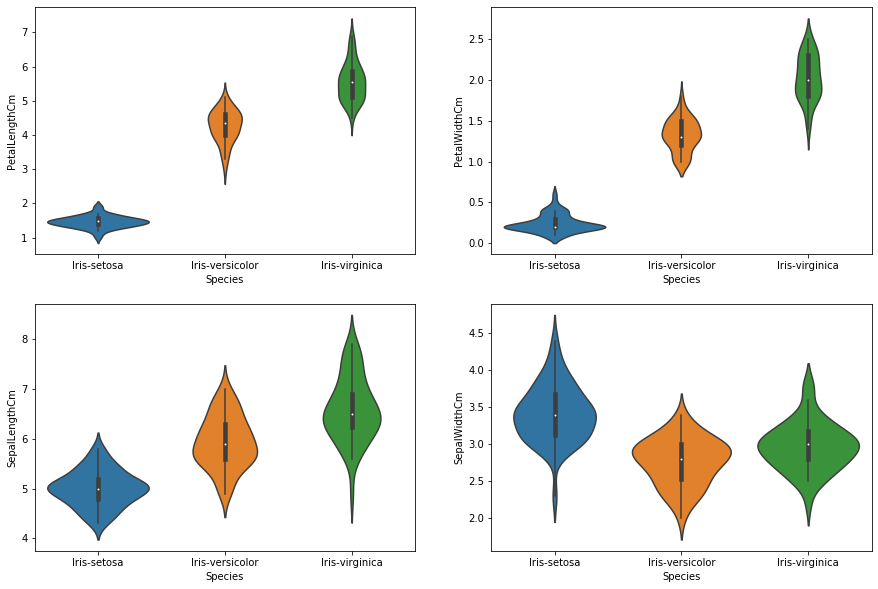

In [59]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_df)


On each side of the gray line is a kernel density estimation to show the distribution shape of the data. the skinnier sections represent a lower probability.

Andrews curves are a method for visualizing multidimensional data by mapping each observation onto a function.

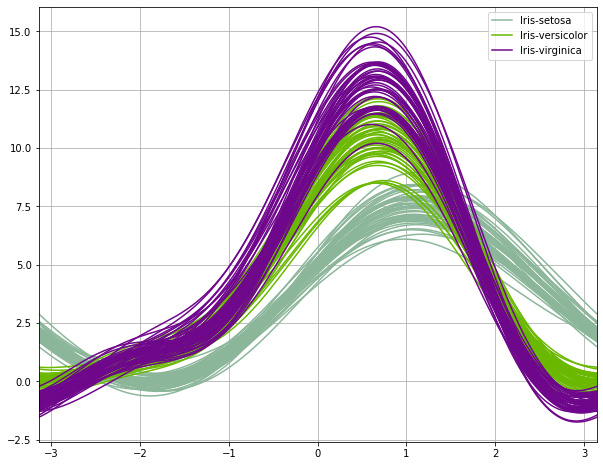

In [60]:
plt.figure(figsize=(10,8))
pd.plotting.andrews_curves(iris_df,'Species')

In the plot above, the each color used represents a class and we can easily note that the lines that represent samples from the same class have similar curves.

Let's check if we have any correlation between features

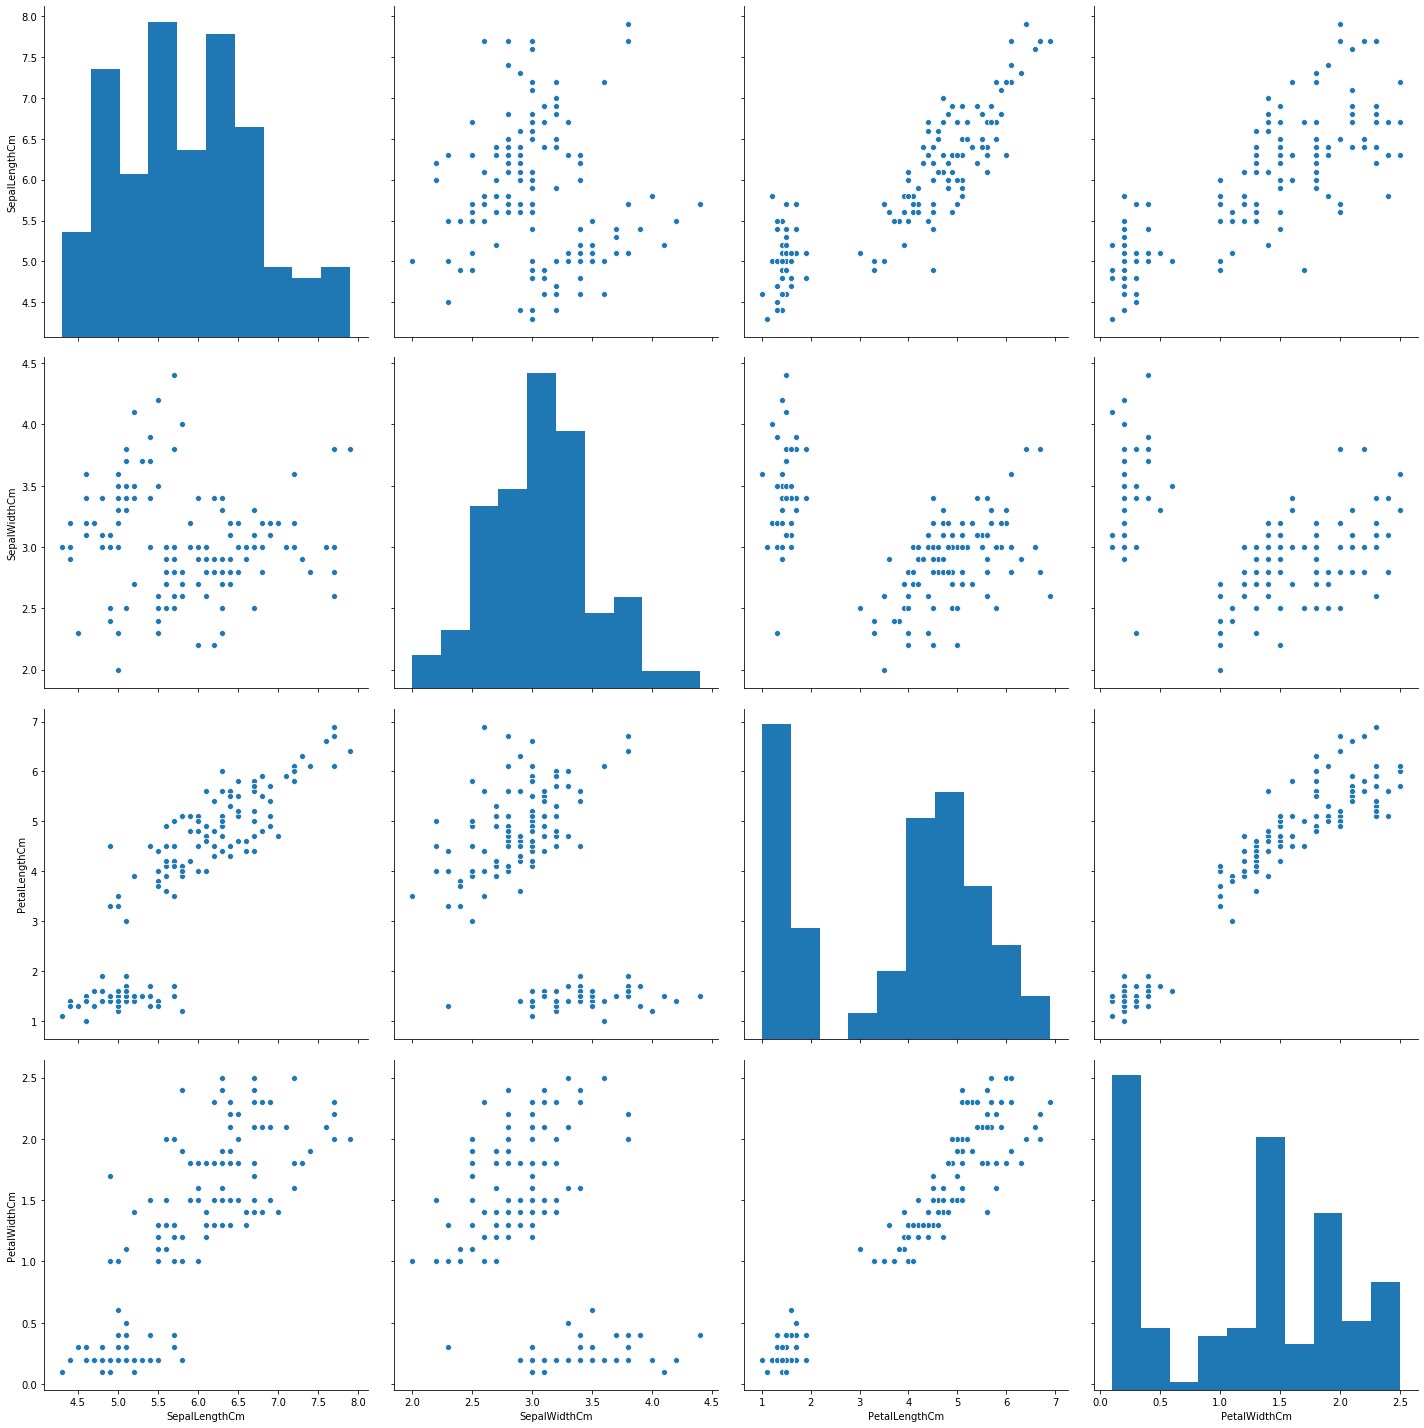

In [61]:
sns.pairplot(iris_df,size=5)
plt.show()

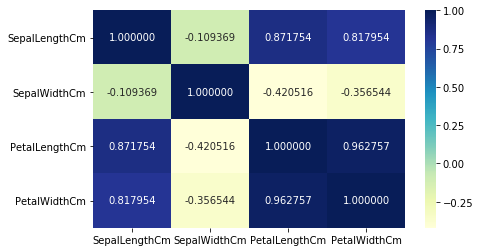

In [62]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris_df.corr(),annot=True,fmt="f",cmap="YlGnBu")
plt.show()

we have a strong correlation between Petal Width and Petal length , and also between Petal characteristics and Sepal Length.

Let's create a regression plot for both petal and sepal

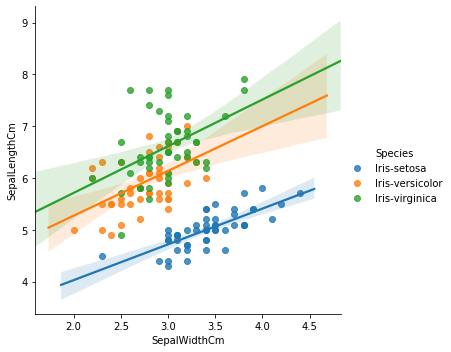

In [63]:
sns.lmplot(x="SepalWidthCm", y="SepalLengthCm",hue="Species",data=iris_df)

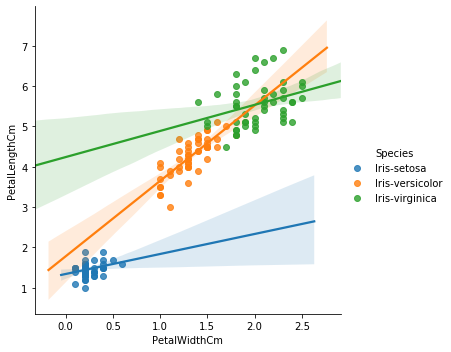

In [64]:
sns.lmplot(x="PetalWidthCm", y="PetalLengthCm",hue="Species",data=iris_df)

### Predicting the optimum number of clusters using K-means Clustering 

Now we will implement 'The elbow method' on the Iris dataset. The elbow method allows us to pick the optimum amount of clusters for classification. although we already know the answer is 3 it is still interesting to run.

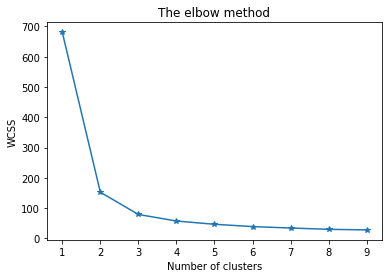

In [65]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# allowing us to observe 'The elbow'
plt.plot(range(1, 10), wcss, marker = '*')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration. 

Now that we have the optimum amount of clusters, 
we can move on to applying K-means clustering to the Iris dataset.

In [66]:
import scipy.stats as stats

for i in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]:
        j,pvalue = stats.normaltest(iris_df[i])
        if(pvalue < 0.05):
#if the value is less then 0.05 then the distribution is not normal and our hypothesis are true.
            print("%s has a pvalue of %f - distribution is not normal"%(i,pvalue))
        else:
            print("%s has pvalue of %f"%(i,pvalue))

SepalLengthCm has pvalue of 0.056824
SepalWidthCm has pvalue of 0.167241
PetalLengthCm has a pvalue of 0.000000 - distribution is not normal
PetalWidthCm has a pvalue of 0.000000 - distribution is not normal


In [67]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

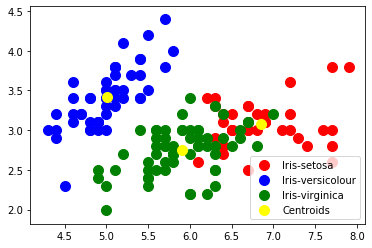

In [68]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()